## Projeto 1 - Ciência de Dados

Nome: Guilherme Carneiro Lunetta

GitHub: https://github.com/GuilhermeLunetta/Projeto1-CienciaDados

## Pergunta a ser respondida

Como a permanência/ingressão no Mercosul influência a Exportação (% do PIB), o IDH (Índice de Desenvolvimento Humano) e o PIB/capita (Produto Interno Bruto) total do país?

## Explicação da hipótese e mecanismo

Mercado Comum do Sul é uma organização intergovernamental fundada a partir do Tratado de Assunção de 1991. Estabelece uma integração, inicialmente, econômica configurada atualmente em uma união aduaneira, na qual há livre comércio intrazona e política comercial comum entre os países-membros.

A partir do parágrafo acima, é razoável pensar que ao ingressar/estar no Mercosul, a exportação de tal país deve aumentar, o que deve aumentar o PIB e por isso aumentar o IDH. Portanto, a hipótese é que todas essas variáveis vão aumentar depois do ano de ingressão de cada país na organização.

Fonte: https://pt.wikipedia.org/wiki/Mercado_Comum_do_Sul

## Base de dados usada

PIB per capita (GDP em inglês) - https://www.gapminder.org/data/documentation/gd001/

IDH - http://hdr.undp.org/en/data

Exportação - https://data.worldbank.org/indicator/NE.EXP.GNFS.ZS

In [1]:
#Importando as bibliotecas necessárias para o projeto

%matplotlib inline

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Análise de dados

In [2]:
#Criando os dataframes que serão analisados, logo menos o join será feito

gdp = pd.read_excel('income_per_person_gdppercapita_ppp_inflation_adjusted.xlsx')
idh = pd.read_excel('hdi_human_development_index.xlsx')
export = pd.read_excel('exports_percent_of_gdp.xlsx')

Eu escolhi por analisar os dados do ano de 1996 pois são 5 anos depois da entrada desses países no Mercosul. Levei em conta que 5 anos são suficientes para adquirir informações de um país pertencente a uma organização.

### PIB per capita / ano (em milhares de dólares)

In [3]:
gdp = gdp.loc[:, ['country', 1991, 1996]]
gdp = gdp.rename(columns = {'country': 'País', 1991:'PIB1991', 1996: 'PIB1996'})
gdp.head(6)

,País,PIB1991,PIB1996
0,Afghanistan,1030,904
1,Albania,3230,4530
2,Algeria,9870,9510
3,Andorra,28000,27200
4,Angola,4210,3210
5,Antigua and Barbuda,16600,17100


### IDH / ano

In [4]:
idh = idh.loc[:, ['country', 1991, 1996]]
idh = idh.rename(columns = {'country':'País', 1991:'IDH1991', 1996:'IDH1996'})
idh.head()

,País,IDH1991,IDH1996
0,Afghanistan,0.300,0.328
1,Albania,0.618,0.637
2,Algeria,0.581,0.609
3,Andorra,NaN,NaN
4,Angola,NaN,NaN


### Taxa de exportação (% do PIB) / ano

In [5]:
export = export.loc[:, ['country', 1991, 1996]]
export = export.rename(columns = {'country':'País', 1991:'EXPORT1991', 1996:'EXPORT1996'})
export.head()

,País,EXPORT1991,EXPORT1996
0,Afghanistan,NaN,NaN
1,Albania,7.22,11.2
2,Algeria,29.10,29.8
3,Angola,28.60,NaN
4,Antigua and Barbuda,76.80,63.5


## Join

In [6]:
gdp_idx = gdp.set_index('País')
idh_idx = idh.set_index('País')
export_idx = export.set_index('País')

df = gdp_idx.join(idh_idx, how='inner')
df.head()

,PIB1991,PIB1996,IDH1991,IDH1996
País,,,,
Afghanistan,1030,904,0.300,0.328
Albania,3230,4530,0.618,0.637
Algeria,9870,9510,0.581,0.609
Andorra,28000,27200,NaN,NaN
Angola,4210,3210,NaN,NaN


In [7]:
data = df.join(export_idx, how='inner')
data.head()

,PIB1991,PIB1996,IDH1991,IDH1996,EXPORT1991,EXPORT1996
País,,,,,,
Afghanistan,1030,904,0.300,0.328,NaN,NaN
Albania,3230,4530,0.618,0.637,7.22,11.2
Algeria,9870,9510,0.581,0.609,29.10,29.8
Angola,4210,3210,NaN,NaN,28.60,NaN
Antigua and Barbuda,16600,17100,NaN,NaN,76.80,63.5


## Separando apenas os países a serem observados e criando a coluna MERCOSUL

In [17]:
data = data.loc[['Argentina', 'Brazil', 'Uruguay', 'Paraguay', 'Chile', 'Peru', 'Colombia'], ['PIB1991', 'PIB1996', 'IDH1991', 'IDH1996', 'EXPORT1991', 'EXPORT1996']]
data['MERCOSUL'] = 'Sim'
data.loc[['Chile', 'Peru', 'Colombia'], ['MERCOSUL']] = 'Não'
data

,PIB1991,PIB1996,IDH1991,IDH1996,EXPORT1991,EXPORT1996,MERCOSUL
País,,,,,,,
Argentina,12000.0,14500.0,0.713,0.738,7.68,10.40,Sim
Brazil,10300.0,11100.0,0.615,0.656,8.68,6.73,Sim
Uruguay,10100.0,12100.0,0.697,0.717,20.70,19.70,Sim
Paraguay,6090.0,6590.0,0.585,0.613,50.80,52.70,Sim
Chile,9540.0,12800.0,0.710,0.735,31.30,26.60,Não
Peru,5320.0,6300.0,0.616,0.647,12.10,13.30,Não
Colombia,7560.0,8480.0,0.595,0.635,21.30,15.20,Não


É possível analisar a partir desse gráfico que os países que pertencem ao Mercosul tiveram um aumento tanto no PIB quanto no IDH. Os países fora do Mercosul também tiveram aumentos tanto no PIB quanto no IDH. A exportação é uma variável mais complicada, pois alguns países tanto do Mercosul como de fora tiveram uma baixa na taxa de exportação em % do PIB.

## Análise dos resultados com gráficos

### Gráfico de dispersão PIB x IDH em 1996

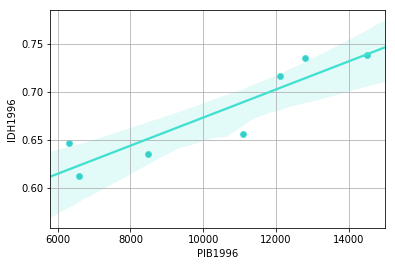

In [9]:
data.plot.scatter(x='PIB1996', y='IDH1996')
sns.regplot(data['PIB1996'], data['IDH1996'], color=('turquoise'))
plt.grid(True)

In [10]:
data.loc[:, ['PIB1996', 'IDH1996']].corr()

,PIB1996,IDH1996
PIB1996,1.000000,0.905667
IDH1996,0.905667,1.000000


A correlação entre PIB e IDH em 1996 é 0.905667

A partir dessa informação podemos concluir que os dados mostram o que todos pensam, que o PIB influencia no IDH ou vice-versa. O que também pode-se concluir é que na tabela acima do gráfico foi possível observar que quando o PIB aumenta o IDH também aumenta em países principalmente do Mercosul, mas também países que não estão nessa organização.

### Gráfico de dispersão PIB x Exportação em 1996

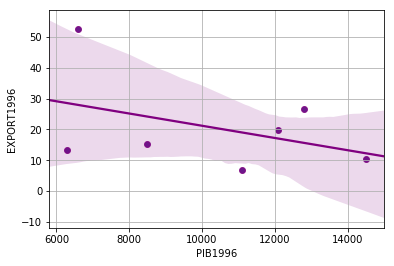

In [11]:
data.plot.scatter(x='PIB1996', y='EXPORT1996')
sns.regplot(data['PIB1996'], data['EXPORT1996'], color=('purple'))
plt.grid(True)

In [12]:
data.loc[:, ['PIB1996', 'EXPORT1996']].corr()

,PIB1996,EXPORT1996
PIB1996,1.000000,-0.406613
EXPORT1996,-0.406613,1.000000


A correlação entre PIB e Exportação é de -0.406613

Isso pode nos dizer que a exportação talvez não influencie o PIB, mostrando o contrário do que a maioria pensa. Também pode-se observar que na tabela principal (join em todas as variáveis) a exportação é a única variável que não bate com a hipótese, e nesse gráfico acima pode ser observado exatamente isso, que ela não influencia no PIB

### Gráfico de dispersão Exportação x IDH em 1996

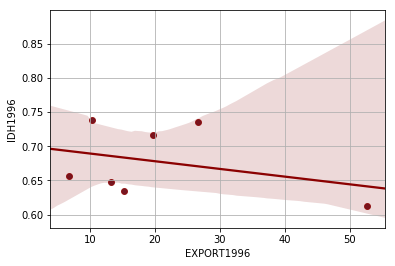

In [13]:
data.plot.scatter(x='EXPORT1996', y='IDH1996')
sns.regplot(data['EXPORT1996'], data['IDH1996'], color=('darkred'))
plt.grid(True)

In [14]:
data.loc[:, ['EXPORT1996', 'IDH1996']].corr()

,EXPORT1996,IDH1996
EXPORT1996,1.000000,-0.339601
IDH1996,-0.339601,1.000000


A correlação entre Exportação e PIB é de -0.339601

Ao contrário do que as pessoas pensam, a taxa de exportação não influencia no IDH dos países. Como dito acima, a exportação é a única variável que não corresponde com as expectativas, ou seja, ela não influencia nem o PIB nem o IDH.

## Gráfico de barras (MERCOSUL)

### PIB

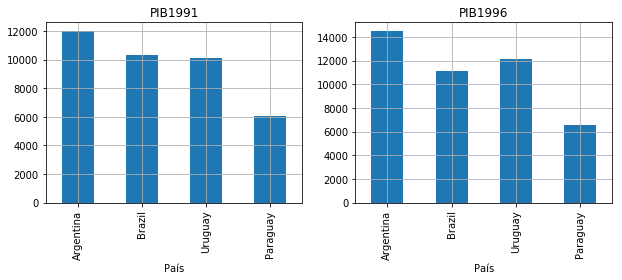

In [18]:
fig = plt.figure(figsize=(13, 4))

plt.subplot(131)
evc=data.PIB1991[data.MERCOSUL=='Sim']
evc.plot(kind='bar', title='PIB1991', legend=False)
plt.grid(True)

plt.subplot(132)
p1996 = data.PIB1996[data.MERCOSUL=='Sim']
p1996.plot(kind='bar', title='PIB1996', legend=False)
plt.grid(True)

plt.tight_layout()
plt.show()

In [25]:
print('A média do PIB de 1991 dos países do MERCOSUL era de {}'.format(data.PIB1991[data.MERCOSUL=='Sim'].mean()))
print('A mediana do PIB de 1991 dos países do MERCOSUL era de {}'.format(data.PIB1991[data.MERCOSUL=='Sim'].median()))
print()
print('A média do PIB de 1996 dos países do MERCOSUL era de {}'.format(data.PIB1996[data.MERCOSUL=='Sim'].mean()))
print('A mediana do PIB de 1996 dos países do MERCOSUL era de {}'.format(data.PIB1996[data.MERCOSUL=='Sim'].median()))
print()
print('Pode-se concluir que o PIB teve um aumento do ano de 1991 até o ano de 1996')

A média do PIB de 1991 dos países do MERCOSUL era de 9622.5
A mediana do PIB de 1991 dos países do MERCOSUL era de 10200.0

A média do PIB de 1996 dos países do MERCOSUL era de 11072.5
A mediana do PIB de 1996 dos países do MERCOSUL era de 11600.0

Pode-se concluir que o PIB teve um aumento do ano de 1991 até o ano de 1996


### IDH

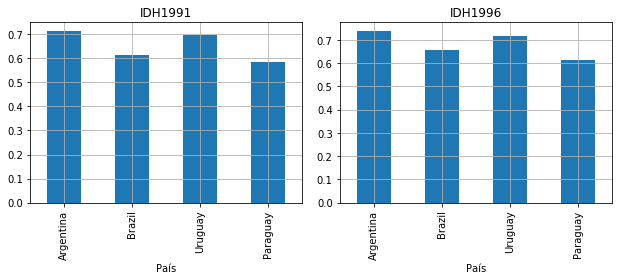

In [19]:
fig = plt.figure(figsize=(13, 4))

plt.subplot(131)
evc=data.IDH1991[data.MERCOSUL=='Sim']
evc.plot(kind='bar', title='IDH1991', legend=False)
plt.grid(True)

plt.subplot(132)
p1996 = data.IDH1996[data.MERCOSUL=='Sim']
p1996.plot(kind='bar', title='IDH1996', legend=False)
plt.grid(True)

plt.tight_layout()
plt.show()

In [28]:
print('A média do IDH de 1991 dos países do MERCOSUL era de {:.3f}'.format(data.IDH1991[data.MERCOSUL=='Sim'].mean()))
print('A mediana do IDH de 1991 dos países do MERCOSUL era de {:.3f}'.format(data.IDH1991[data.MERCOSUL=='Sim'].median()))
print()
print('A média do IDH de 1996 dos países do MERCOSUL era de {:.3f}'.format(data.IDH1996[data.MERCOSUL=='Sim'].mean()))
print('A mediana do IDH de 1996 dos países do MERCOSUL era de {:.3f}'.format(data.IDH1996[data.MERCOSUL=='Sim'].median()))
print()
print('Pode-se concluir que o IDH teve um aumento do ano de 1991 até o ano de 1996')

A média do IDH de 1991 dos países do MERCOSUL era de 0.652
A mediana do IDH de 1991 dos países do MERCOSUL era de 0.656

A média do IDH de 1996 dos países do MERCOSUL era de 0.681
A mediana do IDH de 1996 dos países do MERCOSUL era de 0.686

Pode-se concluir que o IDH teve um aumento do ano de 1991 até o ano de 1996


### Exportação

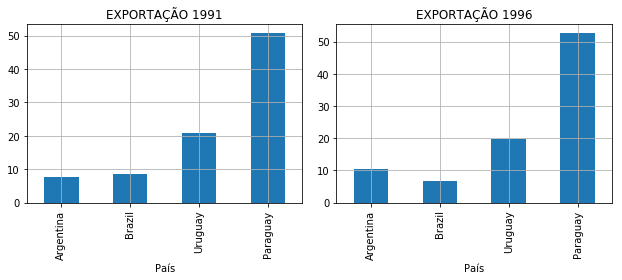

In [20]:
fig = plt.figure(figsize=(13, 4))

plt.subplot(131)
evc=data.EXPORT1991[data.MERCOSUL=='Sim']
evc.plot(kind='bar', title='EXPORTAÇÃO 1991', legend=False)
plt.grid(True)

plt.subplot(132)
p1996 = data.EXPORT1996[data.MERCOSUL=='Sim']
p1996.plot(kind='bar', title='EXPORTAÇÃO 1996', legend=False)
plt.grid(True)

plt.tight_layout()
plt.show()

In [30]:
print('A média da Exportação de 1991 dos países do MERCOSUL era de {:.3f}'.format(data.EXPORT1991[data.MERCOSUL=='Sim'].mean()))
print('A mediana da Exportação de 1991 dos países do MERCOSUL era de {:.3f}'.format(data.EXPORT1991[data.MERCOSUL=='Sim'].median()))
print()
print('A média da Exportação de 1996 dos países do MERCOSUL era de {:.3f}'.format(data.EXPORT1996[data.MERCOSUL=='Sim'].mean()))
print('A mediana da Exportação de 1996 dos países do MERCOSUL era de {:.3f}'.format(data.EXPORT1996[data.MERCOSUL=='Sim'].median()))
print()
print('Pode-se concluir que a Exportação teve um aumento muito pequeno do ano de 1991 até o ano de 1996')

A média da Exportação de 1991 dos países do MERCOSUL era de 21.965
A mediana da Exportação de 1991 dos países do MERCOSUL era de 14.690

A média da Exportação de 1996 dos países do MERCOSUL era de 22.383
A mediana da Exportação de 1996 dos países do MERCOSUL era de 15.050

Pode-se concluir que a Exportação teve um aumento muito pequeno do ano de 1991 até o ano de 1996


# Conclusão

De acordo com as análises feitas acima, é possível concluir que a Exportação não tem tanta influência sobre o PIB de um país do Mercosul e consequentemente sobre o IDH. Isso porque em alguns países a Exportação cai num período de 5 anos, mas o PIB e o IDH continuam a crescer. Ao contrário do que muitos pensam, a Exportação não é tão impactante quanto outros fatores devem ser, e isso poderia ser explorado em um trabalho futuro. Por hora, pode-se dizer que a Exportação tem um peso leve no PIB de um país, mas que o PIB e o IDH mostraram trabalhar em cojunto, quando um cresce, o outro também cresce. 

Uma última observação é, porque que em alguns países a exportação caiu, mesmo estando em uma organização de livre comércio? Essa pergunta pode ser estudada em um trabalho futuro também!